# Text analysis of the Harry Potter book series 

-----

### Text analysis to get the most common characters from the book

In [28]:
import nltk
from nltk import tokenize
from nltk import pos_tag, word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import string
import collections
import pandas as pd
import nltk
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\narae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def read_text(book_name):
    # read the text from text file
    with open(book_name, 'r', encoding='utf-8') as f:
        book = f.read()
    f.close()

    # remove unwanted characters commonly seen in the text
    book = book.replace('\n', ' ')
    book = book.replace('\r', ' ')
    book = book.replace('/', ' ')

    return book

In [30]:
def text_tokenize(book):
    # split the into words 
    tokenized = word_tokenize(book)
    
    # remove punctuation by creating a list containing words that only have alphanumeric characters
    tokenized = [word for word in tokenized if word.isalnum()] # the numbers will be deleted in the later stage anyway
    
    return tokenized


In [31]:
# Part of speech tagging
def pos_tagging(tokenize):
    
    # tag each word with the part of speech it represents
    tagged_text = pos_tag(tokenize)
    return tagged_text

In [32]:
# Identifying single and double proper nouns
def find_proper_nouns(tagged_text):
    
    proper_nouns = []
    i = 0
    while i < len(tagged_text):
        # looks at the second value in each word pair and determines if it's equal to 'NNP'
        # so this will give us characters who has two proper nouns such as Professor Snape, or Harry Potter
        if tagged_text[i][1] == 'NNP':
            if tagged_text[i+1][1] == 'NNP':
                proper_nouns.append(tagged_text[i][0].lower() +
                                    " " + tagged_text[i+1][0].lower())
                i+=1 
            else:
                # if the second value isn't NNP then only the first word is appended
                proper_nouns.append(tagged_text[i][0].lower())
        i+=1 
        
    # remove name words that are less than 3 letters to raise recognition accuracy
    proper_nouns = [x for x in proper_nouns if len(x) >= 3]
    
    return proper_nouns


In [33]:
def count_nouns(proper_nouns, top_num):

    # count the number of proper_nouns
    counts = dict(Counter(proper_nouns).most_common(top_num))
    noun_list = [pair[0] for pair in sorted(counts.items(), key=lambda item: item[1])]
    
    return counts

In [34]:
book = read_text('Book1-4.txt')
tokenized_text = text_tokenize(book)
tagged_text = pos_tagging(tokenized_text)
text_propernouns = find_proper_nouns(tagged_text)
text_counted_nouns = count_nouns(text_propernouns, 100) 

# print the count of the single and double proper nouns occurring in the text
print(text_counted_nouns)

{'harry': 6707, 'ron': 2404, 'harry potter': 2207, 'hermione': 1767, 'page': 1196, 'hagrid': 1012, 'goblet': 840, 'dumbledore': 783, 'fire rowling': 694, 'snape': 609, 'weasley': 508, 'prisoner': 486, 'malfoy': 477, 'chamber': 449, 'azkaban rowling': 414, 'philosophers stone': 347, 'professor mcgonagall': 330, 'fred': 307, 'secrets rowling': 307, 'moody': 304, 'uncle vernon': 282, 'dobby': 279, 'black': 263, 'george': 260, 'neville': 259, 'hogwarts': 258, 'sirius': 256, 'voldemort': 252, 'lupin': 246, 'percy': 239, 'well': 237, 'gryffindor': 233, 'dudley': 228, 'potter': 224, 'cedric': 211, 'slytherin': 182, 'crouch': 179, 'lockhart': 175, 'fudge': 166, 'ministry': 165, 'harry ron': 162, 'rowling': 153, 'filch': 151, 'ginny': 150, 'krum': 149, 'quidditch': 148, 'don': 146, 'azkaban': 144, 'bagman': 144, 'dursleys': 137, 'fire': 137, 'wood': 135, 'aunt petunia': 132, 'winky': 132, 'goyle': 122, 'karkaroff': 122, 'professor lupin': 121, 'come': 114, 'riddle': 114, 'professor trelawney': 

### WordCloud of the nouns

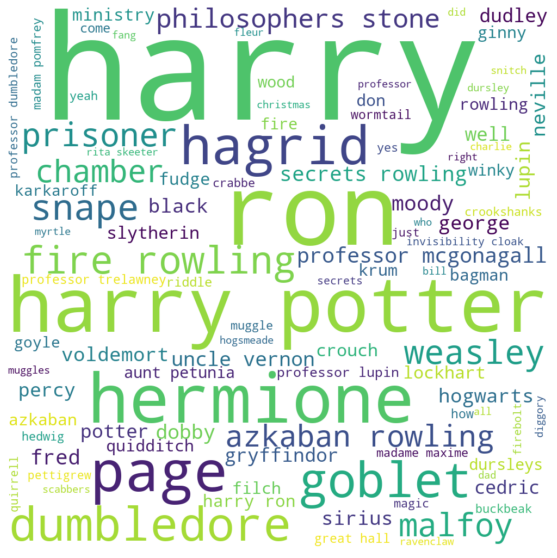

In [35]:
# Create and generate a word cloud image:
# wordcloud = WordCloud( margin=10, min_font_size=12, max_words=500, 
#                       random_state=1, colormap=ColorMap, background_color=None, mode='RGBA').generate_from_frequencies(text_counted_nouns)
wordcloud = WordCloud(width=1000, height=1000,background_color='white').generate_from_frequencies(text_counted_nouns)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment analysis on each of the four books

In [36]:
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\narae\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
def book_sentimentanalysis(book):
    print('-- Reading in',book,' --')
    # read text file as book
    book_ = read_text(book)
    # tokenize into sentences
    sentences = tokenize.sent_tokenize(book_)

    # Sentiment Intensity Analyzer
    si_analyzer=nltk.sentiment.vader.SentimentIntensityAnalyzer()

    # Create dataframe for the books with the sentences
    book_df = pd.DataFrame(sentences)
    book_df.columns = ['Sentences']

    # Get intensity scores of each sentence
    book_df['Score']=book_df.Sentences.apply(lambda x: si_analyzer.polarity_scores(x))
    
    # Place scores in own columns
    book_df['Compound']=book_df.Score.apply(lambda x: x.get("compound"))
    book_df['Positive']=book_df.Score.apply(lambda x: x.get("pos"))
    book_df['Negative']=book_df.Score.apply(lambda x: x.get("neg"))
    book_df['Neutral']=book_df.Score.apply(lambda x: x.get("neu"))
    
    # Adding Sentiment Flags
    book_df['PosFlag'] = book_df.Compound.apply(lambda x: 1 if x >= 0.05 else 0)
    book_df['NegFlag'] = book_df.Compound.apply(lambda x: 1 if x <= -0.05 else 0)
    book_df['NeuFlag'] = book_df.Compound.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)
    
    print('Total number sentences: ',len(sentences))
    print('Number of positive sentences: ', book_df['PosFlag'].sum())
    print('Number of negative sentences: ', book_df['NegFlag'].sum())
    print('Number of neutral sentences: ', book_df['NeuFlag'].sum())
    

In [57]:
book_sentimentanalysis('Book1.txt')

-- Reading in Book1.txt  --
Total number sentences:  5066
Number of positive sentences:  1324
Number of negative sentences:  1193
Number of neutral sentences:  2549


In [39]:
book_sentimentanalysis('Book2.txt')

-- Reading in Book2.txt  --
Total number sentences:  5448
Number of positive sentences:  1424
Number of negative sentences:  1472
Number of neutral sentences:  2552


In [40]:
book_sentimentanalysis('Book3.txt')

-- Reading in Book3.txt  --
Total number sentences:  7440
Number of positive sentences:  1743
Number of negative sentences:  2155
Number of neutral sentences:  3542


In [41]:
book_sentimentanalysis('Book4.txt')

-- Reading in Book4.txt  --
Total number sentences:  12133
Number of positive sentences:  3156
Number of negative sentences:  3412
Number of neutral sentences:  5565


## Character analysis 

In [42]:
df = pd.read_csv('hp_script.csv',encoding='cp1252')

In [43]:
df['character_name'].value_counts()

Harry Potter            230
Ron Weasley             120
Hermione Granger         92
Rubeus Hagrid            81
Minerva McGonagall       31
Albus Dumbledore         24
Vernon Dursley           23
Dudley Dursley           17
Quirinus Quirrell        17
Neville Longbottom       14
Petunia Dursley          13
Draco Malfoy             13
Rolanda Hooch            12
Severus Snape             9
Voldemort                 8
Lee Jordan                8
Oliver Wood               8
Sorting Hat               7
Percy Weasley             6
Argus Filch               6
Nearly Headless Nick      5
Firenze                   5
Seamus Finnigan           5
Molly Weasley             5
Fred Weasley              5
Filius Flitwick           4
George Weasley            4
Griphook                  3
Garrick Ollivander        3
Goblin                    2
Tom                       2
Class                     2
Ginny Weasley             1
Bloody Baron              1
Snake                     1
Trolley lady        

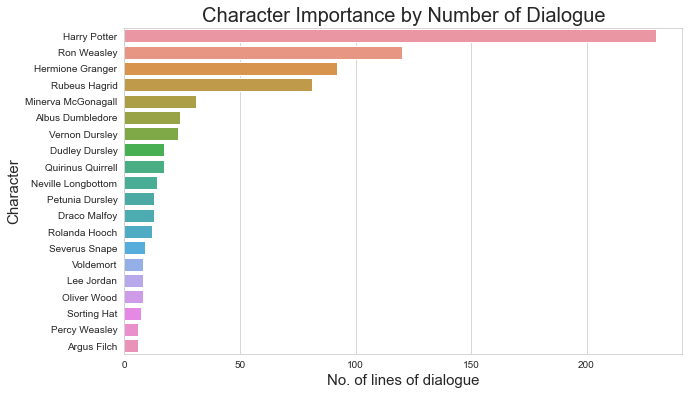

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(y='character_name', data=df, order=df.character_name.value_counts().iloc[:20].index)
plt.xlabel('No. of dialogue lines', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Character Importance by Count of Dialogue', fontsize=20)
plt.show()

In [45]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_csvfile(sentence):
    sentence=str(sentence)
    # change to lowercase
    sentence = sentence.lower()
    # remove links and symbols 
    sentence = sentence.replace('{html}',"") 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, '', sentence)
    remove_url = re.sub(r'http\S+', '',clean_text)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(remove_url)  
    # remove numbers and stopwords
    words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and w.isalnum()]
    
    # stemming
    stem_words = [PorterStemmer().stem(w) for w in words]
    # lemmatization
    lem_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(words)


In [46]:
df['cleanText']=df['dialogue'].map(lambda x:preprocess_csvfile(x))

In [47]:
common_words = Counter(" ".join(df["cleanText"]).split()).most_common(10)
common_words

[('harry', 88),
 ('know', 50),
 ('one', 48),
 ('see', 45),
 ('potter', 41),
 ('well', 41),
 ('got', 39),
 ('come', 38),
 ('right', 32),
 ('hagrid', 30)]

In [48]:
harry = df[df['character_name']=='Harry Potter']
harry_words = Counter(" ".join(harry["cleanText"]).split()).most_common(5)
harry_words

[('hagrid', 20), ('know', 17), ('ron', 12), ('one', 10), ('think', 10)]

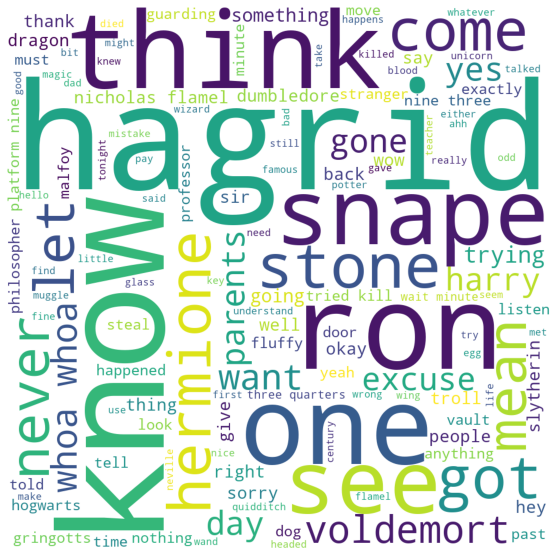

In [49]:
harry_text = " ".join(line for line in harry["cleanText"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(harry_text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [50]:
ron = df[df['character_name']=='Ron Weasley']
ron_words = Counter(" ".join(ron["cleanText"]).split()).most_common(5)
ron_words

[('harry', 17), ('got', 9), ('know', 8), ('one', 7), ('think', 7)]

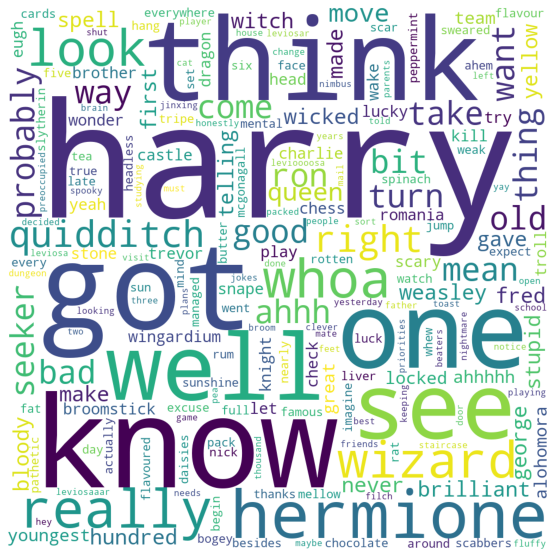

In [51]:
ron_text = " ".join(line for line in ron["cleanText"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(ron_text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:
hermione = df[df['character_name']=='Hermione Granger']
hermione_words = Counter(" ".join(hermione["cleanText"]).split()).most_common(5)
hermione_words

[('harry', 11), ('going', 7), ('know', 6), ('stone', 6), ('like', 5)]

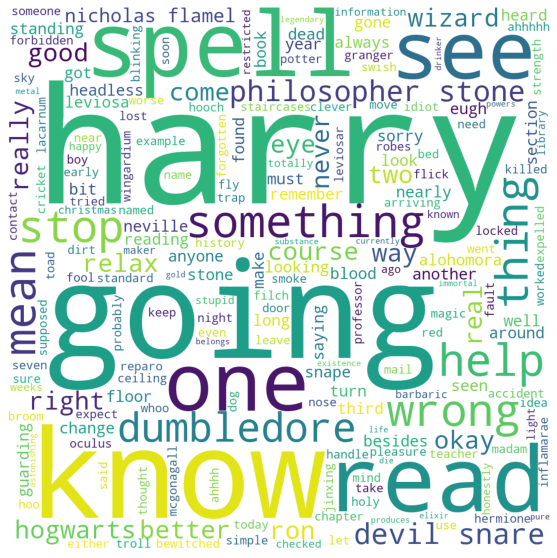

In [53]:
hermione_text = " ".join(line for line in hermione["cleanText"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(hermione_text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()